In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [3]:
# Importing csv  

kc_house_data = pd.read_csv('new_merge.csv')
kc_house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prop_crime_rate_per_1k
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,12.565414
1,205425.0,2,1.00,880,6780,1.0,0,0,4,6,880,0,1945,0,98178,47.5009,-122.248,1190,6780,12.565414
2,445000.0,3,2.25,2100,8201,1.0,0,2,3,8,1620,480,1967,0,98178,47.5091,-122.244,2660,8712,12.565414
3,236000.0,3,1.00,1300,5898,1.0,0,0,3,7,1300,0,1961,0,98178,47.5053,-122.255,1320,7619,12.565414
4,170000.0,2,1.00,860,5265,1.0,0,0,3,6,860,0,1931,0,98178,47.5048,-122.272,1650,8775,12.565414


In [4]:
#Checking for Datatypes
kc_house_data.dtypes

price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront                  int64
view                        int64
condition                   int64
grade                       int64
sqft_above                  int64
sqft_basement               int64
yr_built                    int64
yr_renovated                int64
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
prop_crime_rate_per_1k    float64
dtype: object

In [5]:
#Finding Min/Max of price 
kc_house_data.min()

price                     78000.00000
bedrooms                      0.00000
bathrooms                     0.00000
sqft_living                 370.00000
sqft_lot                    520.00000
floors                        1.00000
waterfront                    0.00000
view                          0.00000
condition                     1.00000
grade                         4.00000
sqft_above                  370.00000
sqft_basement                 0.00000
yr_built                   1900.00000
yr_renovated                  0.00000
zipcode                   98102.00000
lat                          47.46960
long                       -122.41600
sqft_living15               460.00000
sqft_lot15                  651.00000
prop_crime_rate_per_1k        0.04683
dtype: float64

C:\Users\tmam9\Anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


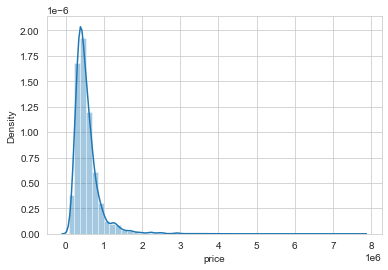

In [6]:
x = kc_house_data.price
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

C:\Users\tmam9\Anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


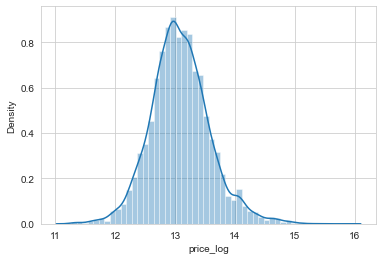

In [7]:
kc_house_data['price_log'] = np.log(kc_house_data.price)
x = kc_house_data.price_log
sns.distplot(x)
plt.show()

# Linear Regression #  

In [21]:
#corr = kc_house_data.corr()
#sns.heatmap(corr)

In [19]:
new_df = kc_house_data[['price', 'price_log','sqft_living', 'floors', 'waterfront', 'view', 'yr_renovated', 'prop_crime_rate_per_1k']]
new_df

,price,price_log,sqft_living,floors,waterfront,view,yr_renovated,prop_crime_rate_per_1k
0,221900.0,12.309982,1180,1.0,0,0,0,12.565414
1,205425.0,12.232836,880,1.0,0,0,0,12.565414
2,445000.0,13.005830,2100,1.0,0,2,0,12.565414
3,236000.0,12.371587,1300,1.0,0,0,0,12.565414
4,170000.0,12.043554,860,1.0,0,0,0,12.565414
...,...,...,...,...,...,...,...,...
8245,359800.0,12.793304,2170,2.0,0,0,0,51.997918
8246,443000.0,13.001325,2430,2.0,0,0,0,51.997918
8247,249000.0,12.425208,1260,2.0,0,0,0,51.997918
8248,305000.0,12.628067,1590,2.0,0,0,0,51.997918


In [22]:
#corr2 = new_df.corr()
#sns.heatmap(corr2)

In [10]:
columns = ['sqft_living', 'floors', 'waterfront', 'view', 'yr_renovated', "prop_crime_rate_per_1k", 'price', 'price_log']

target = ['price_log']

In [11]:
# Create our features
X = new_df.drop(columns=['price', 'price_log'])
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = new_df['price_log']

In [12]:
X.describe()

,sqft_living,floors,waterfront,view,yr_renovated,prop_crime_rate_per_1k
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000
mean,1789.702667,1.481333,0.005818,0.286545,125.340242,44.866057
std,797.487204,0.597873,0.076059,0.833779,484.298663,22.457606
min,370.000000,1.000000,0.000000,0.000000,0.000000,0.046830
25%,1230.000000,1.000000,0.000000,0.000000,0.000000,36.942876
50%,1630.000000,1.000000,0.000000,0.000000,0.000000,44.748415
75%,2180.000000,2.000000,0.000000,0.000000,0.000000,62.228675
max,12050.000000,3.500000,1.000000,4.000000,2015.000000,87.699296


In [13]:
#Checking the balance of our target values 
y.value_counts()

13.017003    80
12.765688    77
12.959844    75
13.122363    72
12.899220    68
             ..
13.131521     1
14.260196     1
13.322770     1
12.994519     1
12.523799     1
Name: price_log, Length: 1958, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [16]:
model.score(X_train, y_train)

0.5854391001221866

In [17]:
model.score(X_test, y_test)

0.5704179042212156